In [2]:
# Format: {recipient_ID, poster_ID, timestamp}



In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file_path = "/Users/efang/Desktop/coding/Intro-to-ML/CSDS446/data/facebook-wall.txt" 
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["recipient_ID", "poster_ID", "timestamp"])

        Node  In-Degree  Out-Degree
0       1017          1           1
1       1015         20          14
2      14736          0           5
3      14752          2           1
4       1080         26          14
...      ...        ...         ...
45808  39147          0           1
45809  58047          0           1
45810  15784          0           1
45811  58048          1           0
45812  56018          1           0

[45813 rows x 3 columns]


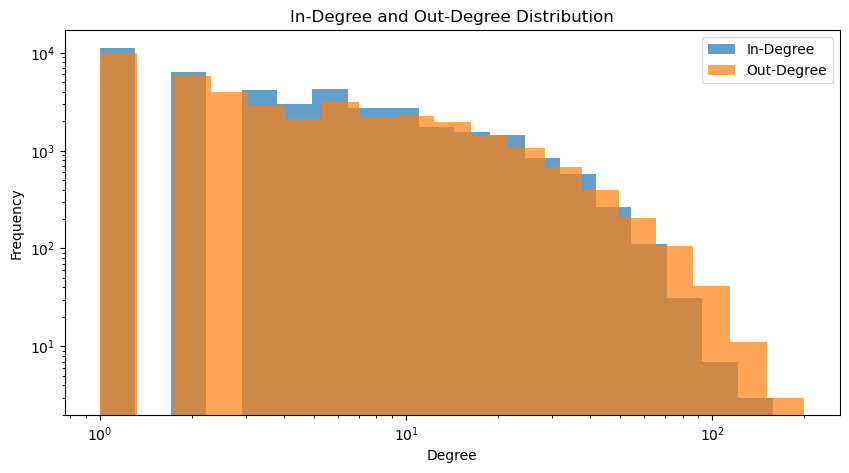

In [5]:

# self posts
data = data[data["recipient_ID"] != data["poster_ID"]]
# directed graph
G = nx.DiGraph()
G.add_edges_from(zip(data["poster_ID"], data["recipient_ID"]))
# find in and out degrees
in_degrees = dict(G.in_degree())  
out_degrees = dict(G.out_degree())  


degree_df = pd.DataFrame({
    "Node": list(G.nodes()),
    "In-Degree": [in_degrees[node] for node in G.nodes()],
    "Out-Degree": [out_degrees[node] for node in G.nodes()]
})

print(degree_df)

# I USED GENERATIVE AI TO HELP GENERATE THE PLOT BELOW

plt.figure(figsize=(10, 5))
plt.hist(in_degrees.values(), bins=np.logspace(0, np.log10(max(in_degrees.values())+1), 20), alpha=0.7, label='In-Degree')
plt.hist(out_degrees.values(), bins=np.logspace(0, np.log10(max(out_degrees.values())+1), 20), alpha=0.7, label='Out-Degree')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.title("In-Degree and Out-Degree Distribution")
plt.show()